In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import json
import os

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy
from pprint import pprint
# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)
 

len(cities)


619

In [3]:
url = "http://api.openweathermap.org/data/2.5/weather?"
temps = []
humid = []
clouds = []
winds = []
lats = []
lons = []
names = []


# Build query URL
for city in cities:
    query_url = url + "appid=" + weather_api_key + "&q=" + city + "&units=imperial"
    response = requests.get(query_url)
    
    if response.status_code == 200:
        response = response.json()
        temps.append(response["main"]["temp"])
        humid.append(response["main"]["humidity"])
        clouds.append(response["clouds"]["all"])
        winds.append(response["wind"]["speed"])
        lats.append(response["coord"]["lat"])
        lons.append(response["coord"]["lon"])
        names.append(response["name"])
     

In [4]:
weatherpy = pd.DataFrame({"City": names,
                        "Temperature (F)": temps,
                        "Humidity (%)": humid,
                        "Cloud Coverage (%)": clouds,
                        "Wind Speed (mph)": winds,
                        "Latitude": lats, 
                        "Longitude": lons
                       })
weatherpy.head()

,City,Temperature (F),Humidity (%),Cloud Coverage (%),Wind Speed (mph),Latitude,Longitude
0,Port Alfred,61.00,69,100,3.00,-33.59,26.89
1,Albany,72.03,54,100,4.61,42.60,-73.97
2,Rikitea,77.27,85,76,11.54,-23.12,-134.97
3,Lata,61.68,88,0,8.99,40.16,-8.33
4,Bredasdorp,51.80,81,100,3.36,-34.53,20.04


In [5]:
# save to html file
Data = weatherpy.to_html()
print(Data)

# Data = open("Data.html", "w")
# Data.write(html)
# Data.close()

#Data.to_html("Data")

<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>City</th>
      <th>Temperature (F)</th>
      <th>Humidity (%)</th>
      <th>Cloud Coverage (%)</th>
      <th>Wind Speed (mph)</th>
      <th>Latitude</th>
      <th>Longitude</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>0</th>
      <td>Port Alfred</td>
      <td>61.00</td>
      <td>69</td>
      <td>100</td>
      <td>3.00</td>
      <td>-33.59</td>
      <td>26.89</td>
    </tr>
    <tr>
      <th>1</th>
      <td>Albany</td>
      <td>72.03</td>
      <td>54</td>
      <td>100</td>
      <td>4.61</td>
      <td>42.60</td>
      <td>-73.97</td>
    </tr>
    <tr>
      <th>2</th>
      <td>Rikitea</td>
      <td>77.27</td>
      <td>85</td>
      <td>76</td>
      <td>11.54</td>
      <td>-23.12</td>
      <td>-134.97</td>
    </tr>
    <tr>
      <th>3</th>
      <td>Lata</td>
      <td>61.68</td>
      <td>88</td>
      <td>0</td>
      <td>8.99</td>
      <td

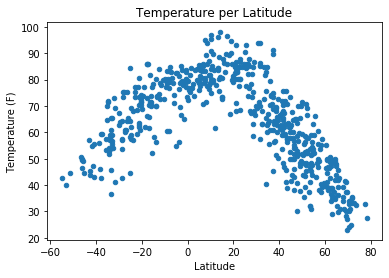

In [6]:
# df.plot.scatter(x='a', y='b');
weatherpy.plot.scatter(x="Latitude", y="Temperature (F)", title="Temperature per Latitude")
#SAVE TO PNG
plt.savefig("LatVsTemp.png")
plt.show()

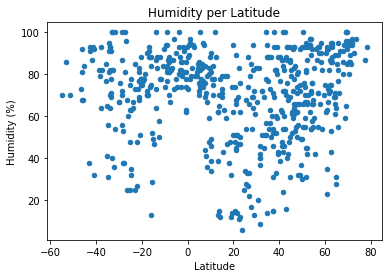

In [7]:
weatherpy.plot.scatter(x="Latitude", y="Humidity (%)", title="Humidity per Latitude")
plt.savefig("LatVsHumidity.png")
plt.show()

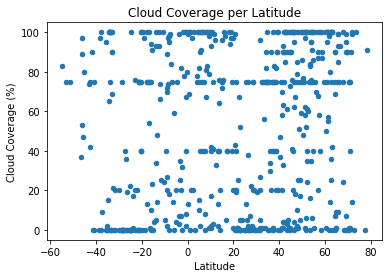

In [8]:
weatherpy.plot.scatter(x="Latitude", y="Cloud Coverage (%)", title="Cloud Coverage per Latitude")

plt.savefig("LatVsCloudiness.png")
plt.show()

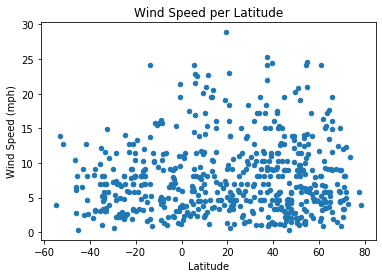

In [9]:
weatherpy.plot.scatter(x="Latitude", y="Wind Speed (mph)", title="Wind Speed per Latitude")
plt.savefig("LatVsWind.png")
plt.show()